In [51]:
import pandas as pd 
import os
import requests
import matplotlib.pyplot as plt 
import numpy as np

In [91]:
# temp only
# response = requests.get("https://archive-api.open-meteo.com/v1/archive?latitude=49.083333&longitude=-122.35&start_date=2010-01-01&end_date=2023-01-01&hourly=temperature_2m&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean&timezone=auto")

# temp, humidity, precipitation, cloudcover
# response = requests.get("https://archive-api.open-meteo.com/v1/archive?latitude=49.083333&longitude=-122.35&start_date=2010-01-01&end_date=2023-01-01&hourly=temperature_2m,relativehumidity_2m,precipitation,cloudcover&daily=temperature_2m_max,temperature_2m_min,temperature_2m_mean,precipitation_sum&timezone=auto")

lat =49.083333
lon = -122.35
response = requests.get("https://archive-api.open-meteo.com/v1/archive?latitude="+str(lat)+"&longitude="+str(lon)+"&start_date=2010-01-01&end_date=2023-01-01&hourly=temperature_2m,relativehumidity_2m,precipitation,cloudcover&timezone=auto")

# hourly data only 
# response = requests.get("https://archive-api.open-meteo.com/v1/archive?latitude=49.083333&longitude=-122.35&start_date=2010-01-01&end_date=2023-01-01&hourly=temperature_2m,relativehumidity_2m,precipitation,cloudcover&timezone=auto")
data = response.json()
data

{'latitude': 49.100006,
 'longitude': -122.3,
 'generationtime_ms': 13.605952262878418,
 'utc_offset_seconds': -25200,
 'timezone': 'America/Vancouver',
 'timezone_abbreviation': 'PDT',
 'elevation': 58.0,
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relativehumidity_2m': '%',
  'precipitation': 'mm',
  'cloudcover': '%'},
 'hourly': {'time': ['2010-01-01T00:00',
   '2010-01-01T01:00',
   '2010-01-01T02:00',
   '2010-01-01T03:00',
   '2010-01-01T04:00',
   '2010-01-01T05:00',
   '2010-01-01T06:00',
   '2010-01-01T07:00',
   '2010-01-01T08:00',
   '2010-01-01T09:00',
   '2010-01-01T10:00',
   '2010-01-01T11:00',
   '2010-01-01T12:00',
   '2010-01-01T13:00',
   '2010-01-01T14:00',
   '2010-01-01T15:00',
   '2010-01-01T16:00',
   '2010-01-01T17:00',
   '2010-01-01T18:00',
   '2010-01-01T19:00',
   '2010-01-01T20:00',
   '2010-01-01T21:00',
   '2010-01-01T22:00',
   '2010-01-01T23:00',
   '2010-01-02T00:00',
   '2010-01-02T01:00',
   '2010-01-02T02:00',
   '2010-01-02T

In [92]:
df_hourly = pd.DataFrame(data["hourly"])
df_hourly["time"] = pd.to_datetime(df_hourly["time"])
df_hourly.set_index("time", inplace=True)

In [93]:

# resample to daily
df_daily = df_hourly.resample('D').agg({'temperature_2m': np.mean, 'relativehumidity_2m': np.mean, 'precipitation': np.sum, 'cloudcover': np.mean})

In [94]:
df_daily

,temperature_2m,relativehumidity_2m,precipitation,cloudcover
time,,,,
2010-01-01,2.900000,99.333333,29.2,93.916667
2010-01-02,3.020833,99.791667,16.1,92.833333
2010-01-03,3.341667,89.666667,2.1,92.958333
2010-01-04,3.287500,99.375000,15.3,100.000000
2010-01-05,3.908333,79.500000,0.5,76.375000
...,...,...,...,...
2022-12-28,2.679167,97.916667,9.0,79.041667
2022-12-29,1.175000,94.833333,2.4,97.625000
2022-12-30,2.891667,98.000000,22.1,94.083333


In [95]:
yearly = df_daily.groupby(df_daily.index.dayofyear).mean()

In [96]:
yearly

,temperature_2m,relativehumidity_2m,precipitation,cloudcover
time,,,,
1,0.138095,79.535714,4.292857,57.750000
2,0.332051,81.669872,9.930769,60.650641
3,0.635256,85.096154,9.661538,55.615385
4,0.924679,88.637821,10.692308,74.596154
5,1.340705,87.201923,9.823077,76.743590
...,...,...,...,...
362,0.850641,93.012821,7.446154,83.625000
363,0.334295,87.275641,4.469231,66.788462
364,-0.293269,86.282051,5.507692,59.173077


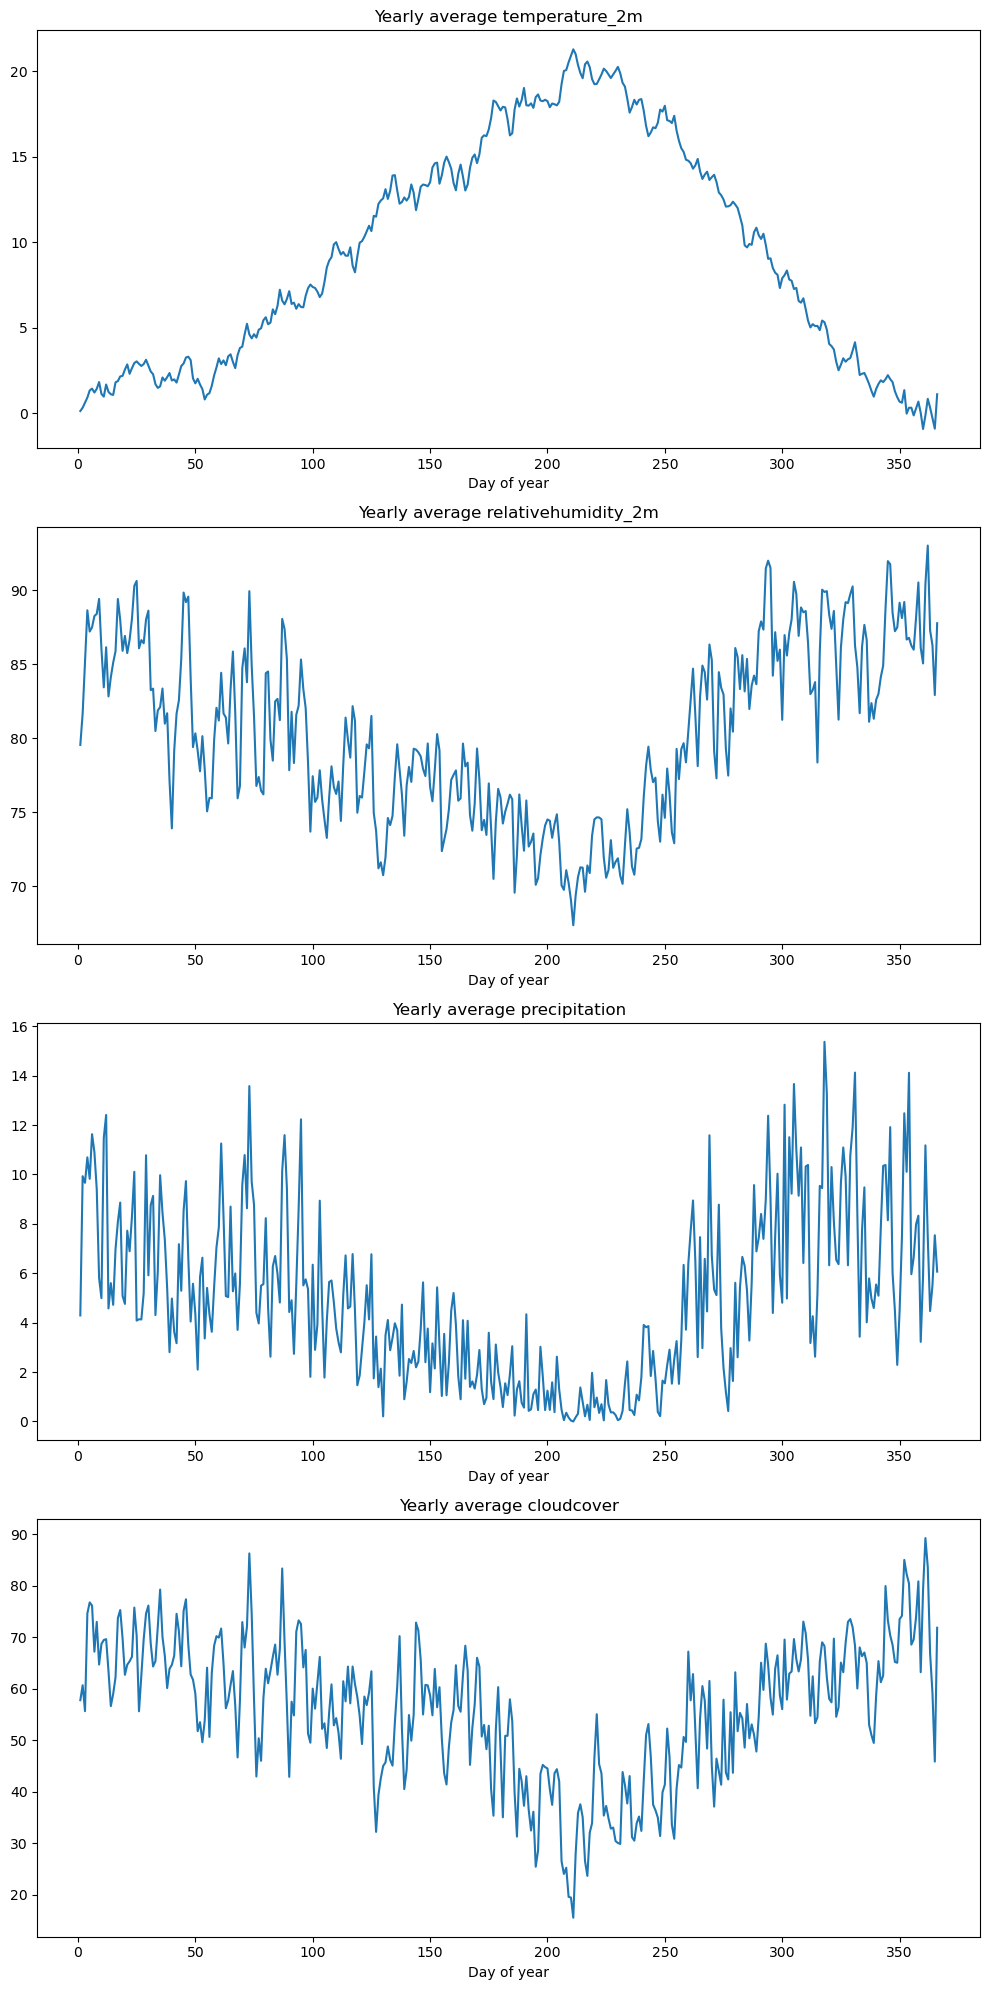

In [97]:
fig, axs = plt.subplots(len(yearly.columns), 1, figsize=(10, 20))

for i, col in enumerate(yearly.columns):
    axs[i].plot(yearly.index, yearly[col])
    axs[i].set_title('Yearly average ' + col)
    axs[i].set_xlabel('Day of year')

plt.tight_layout()
plt.show()

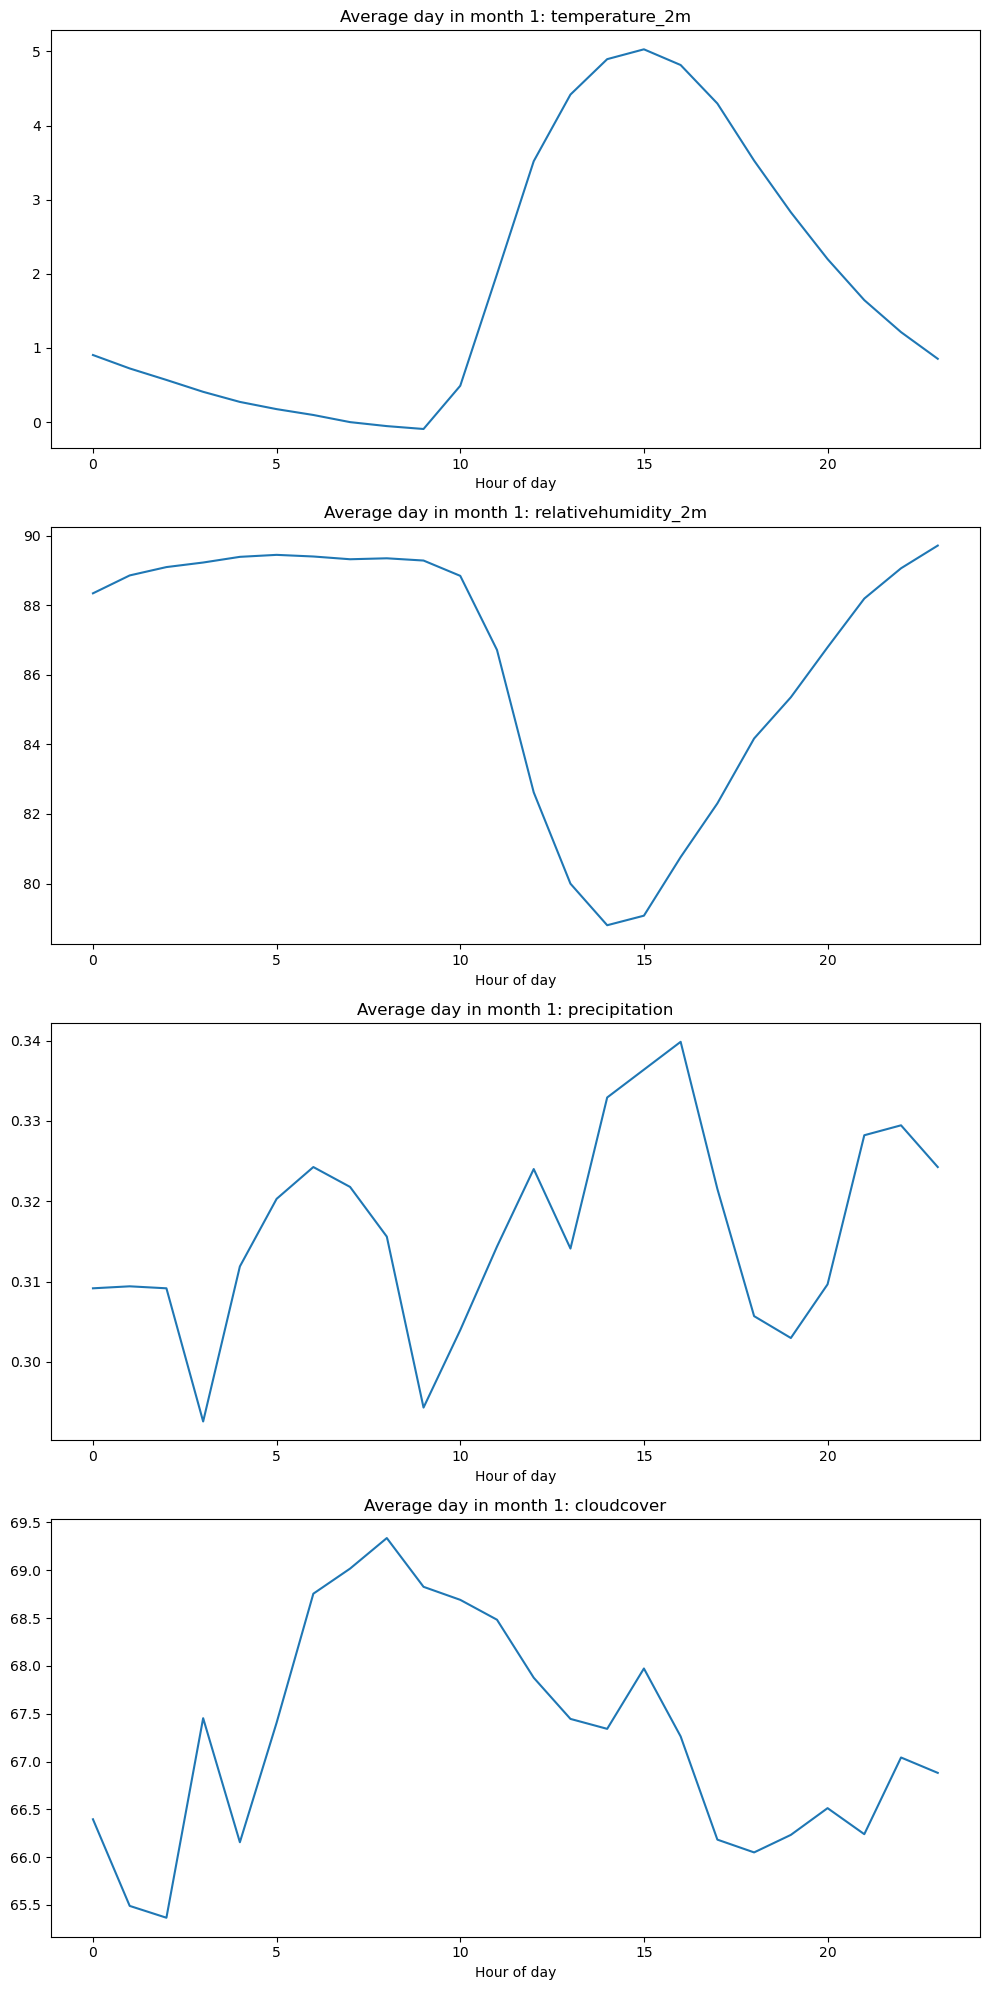

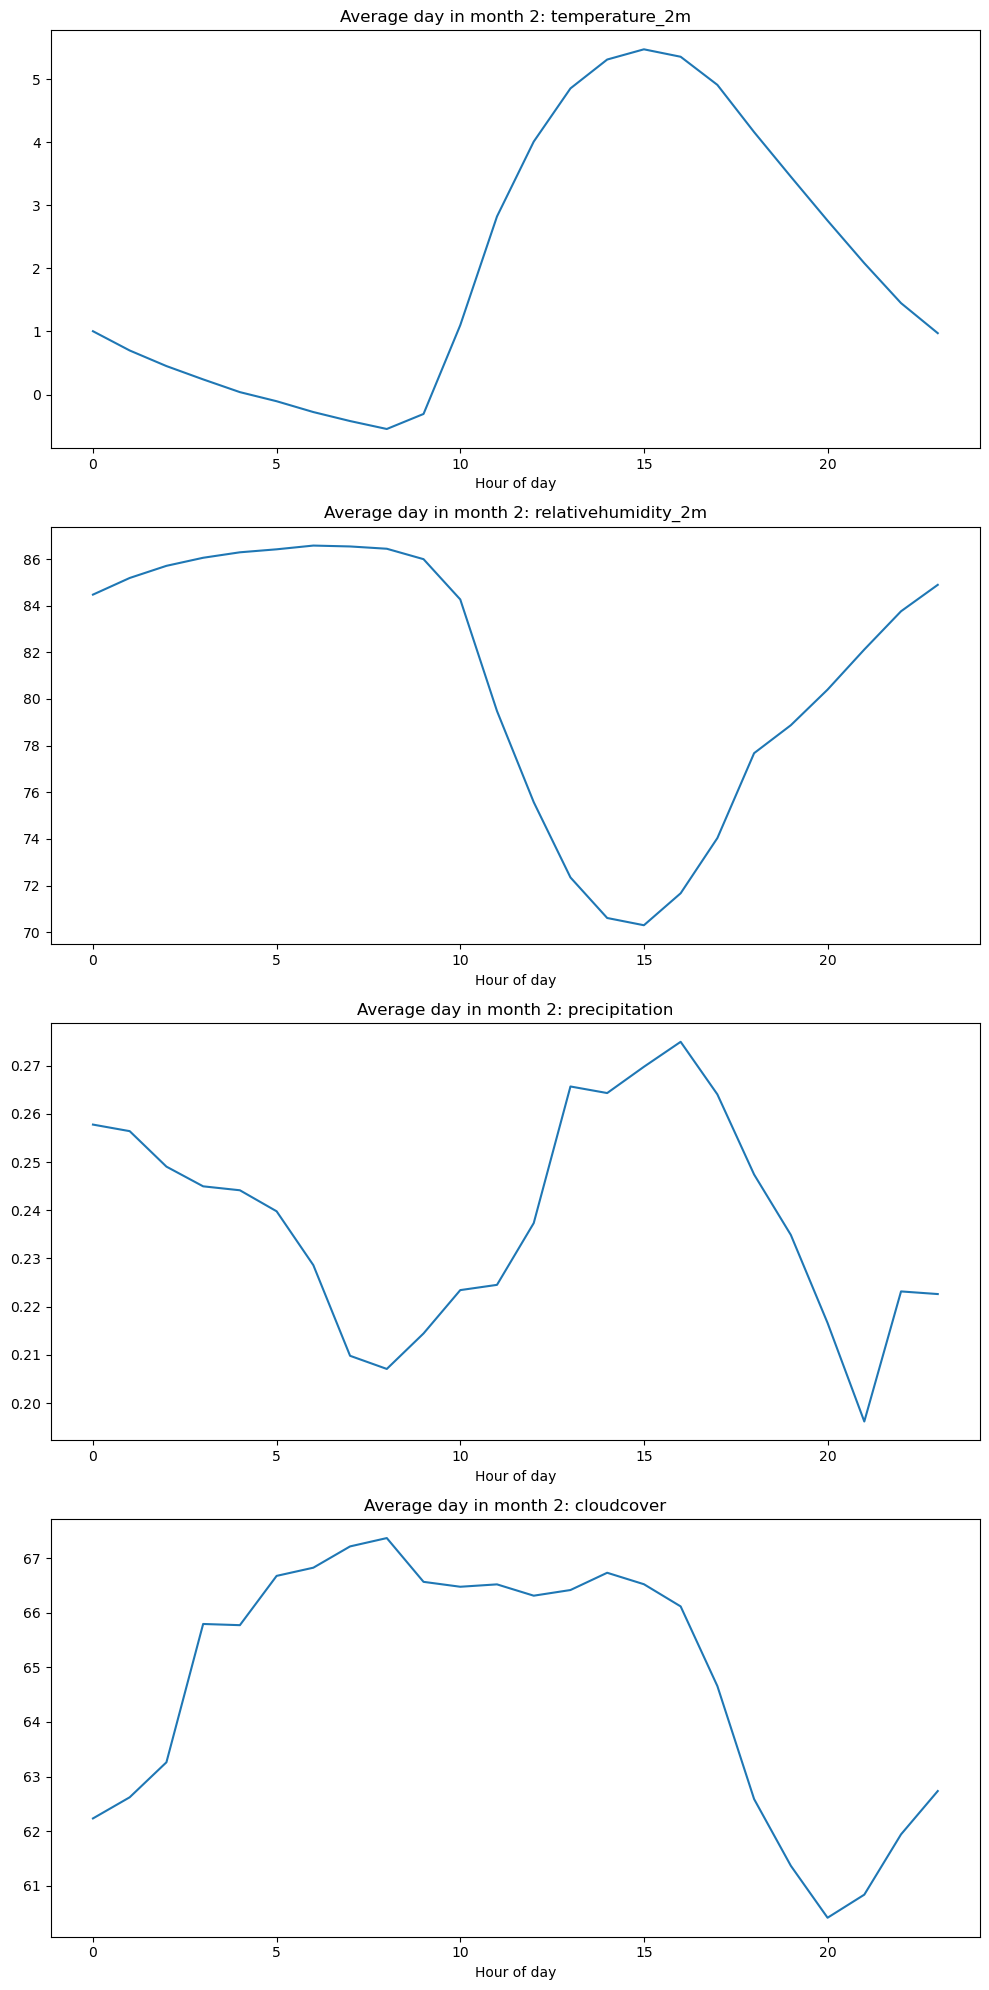

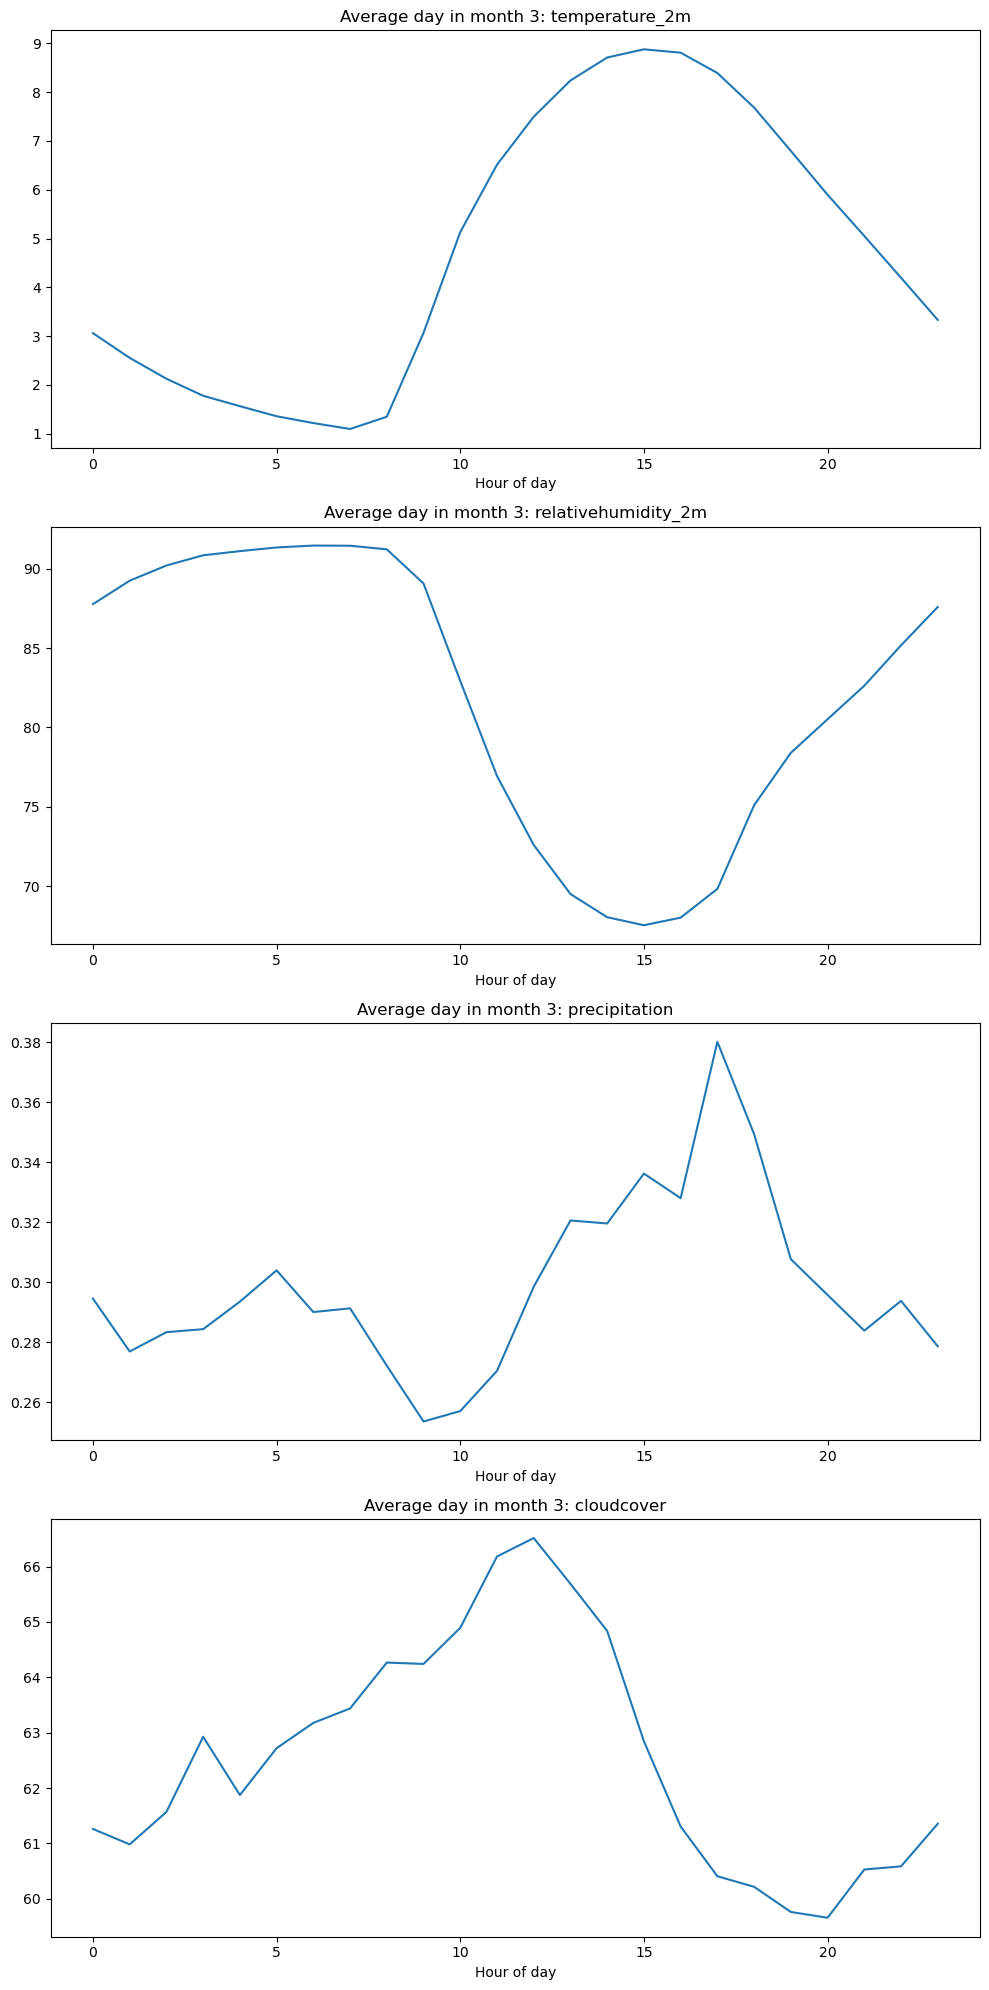

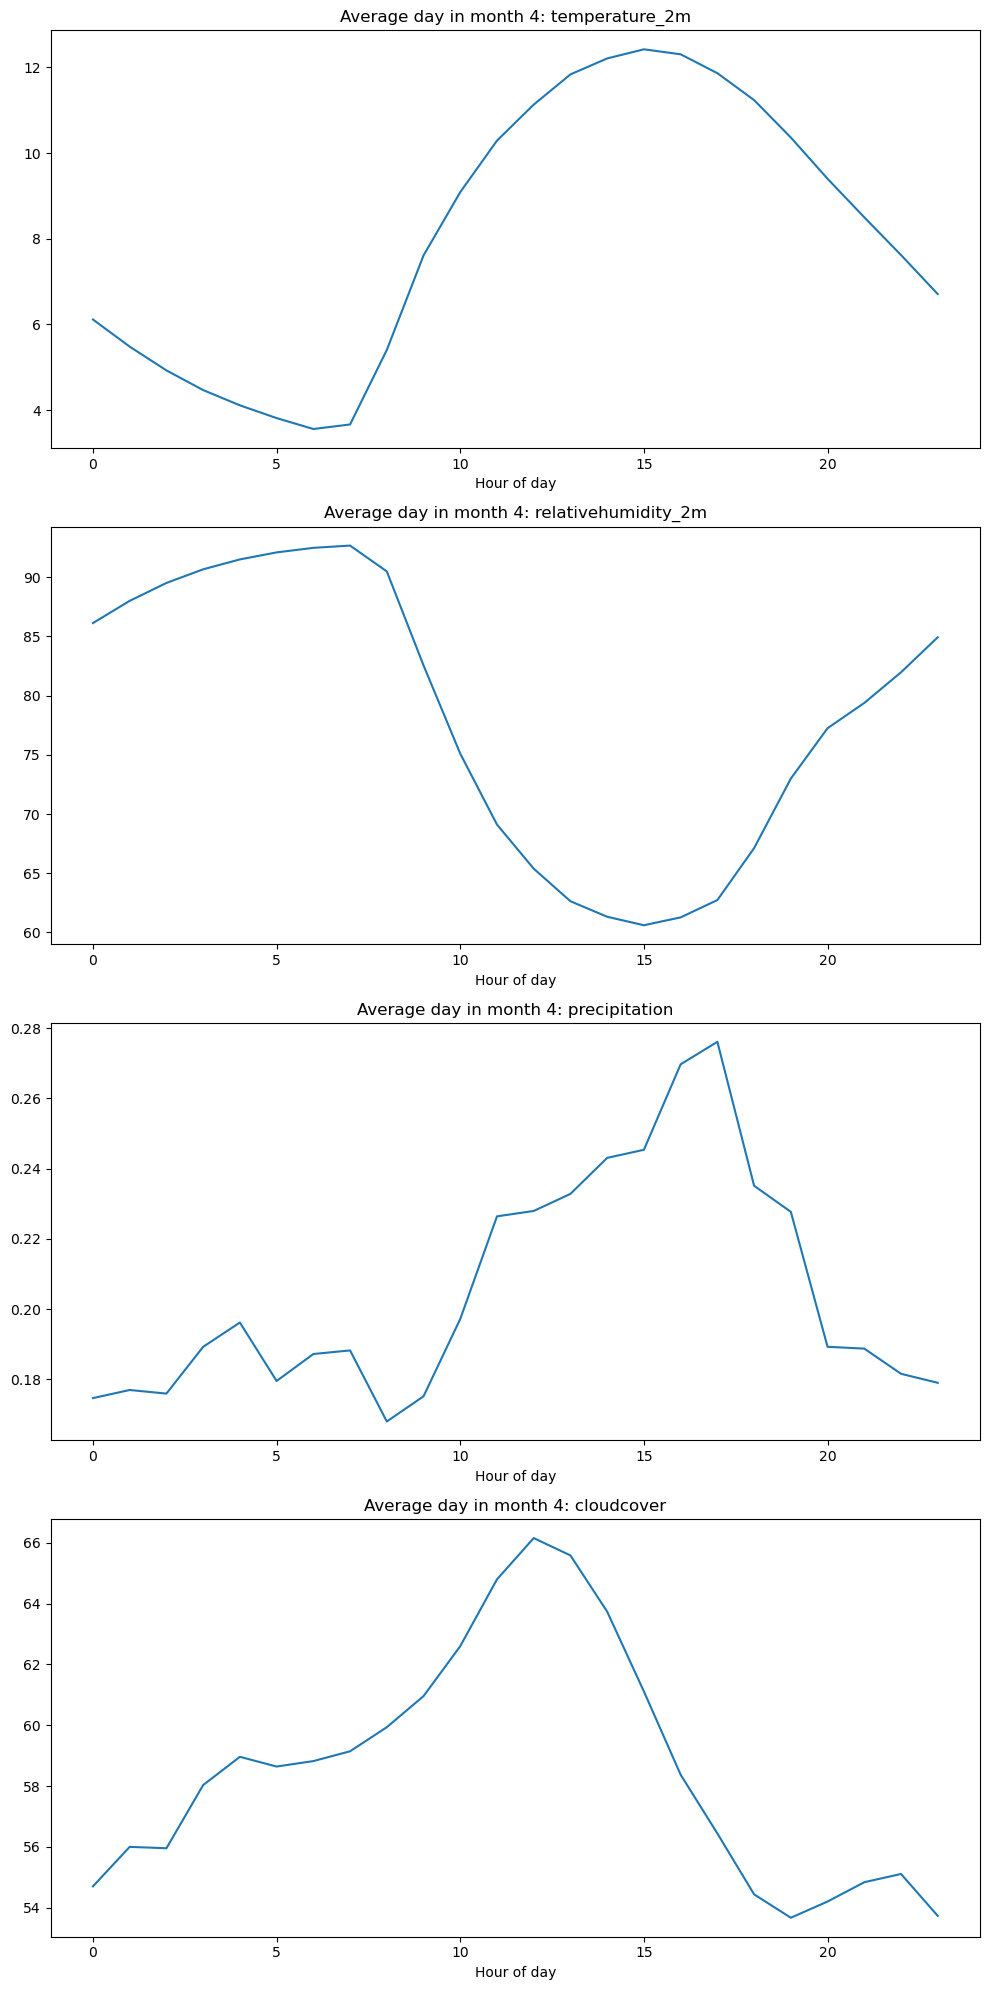

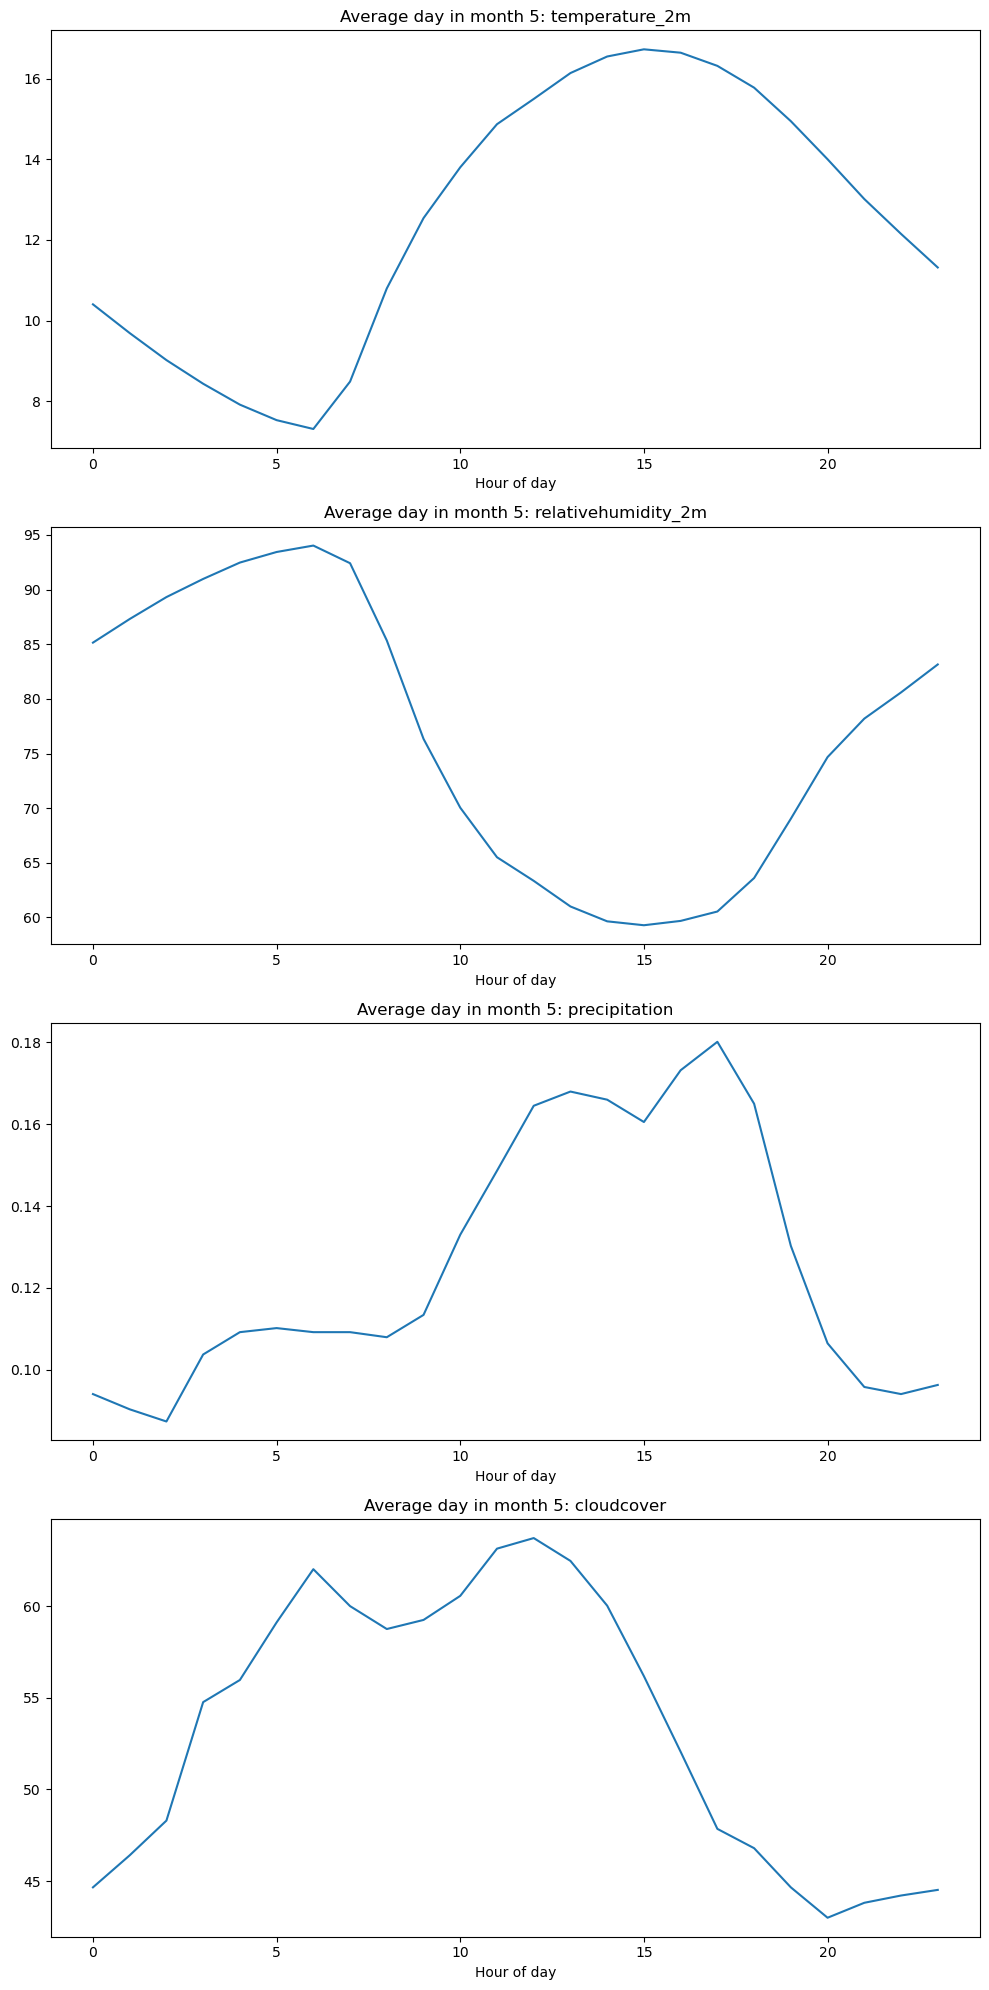

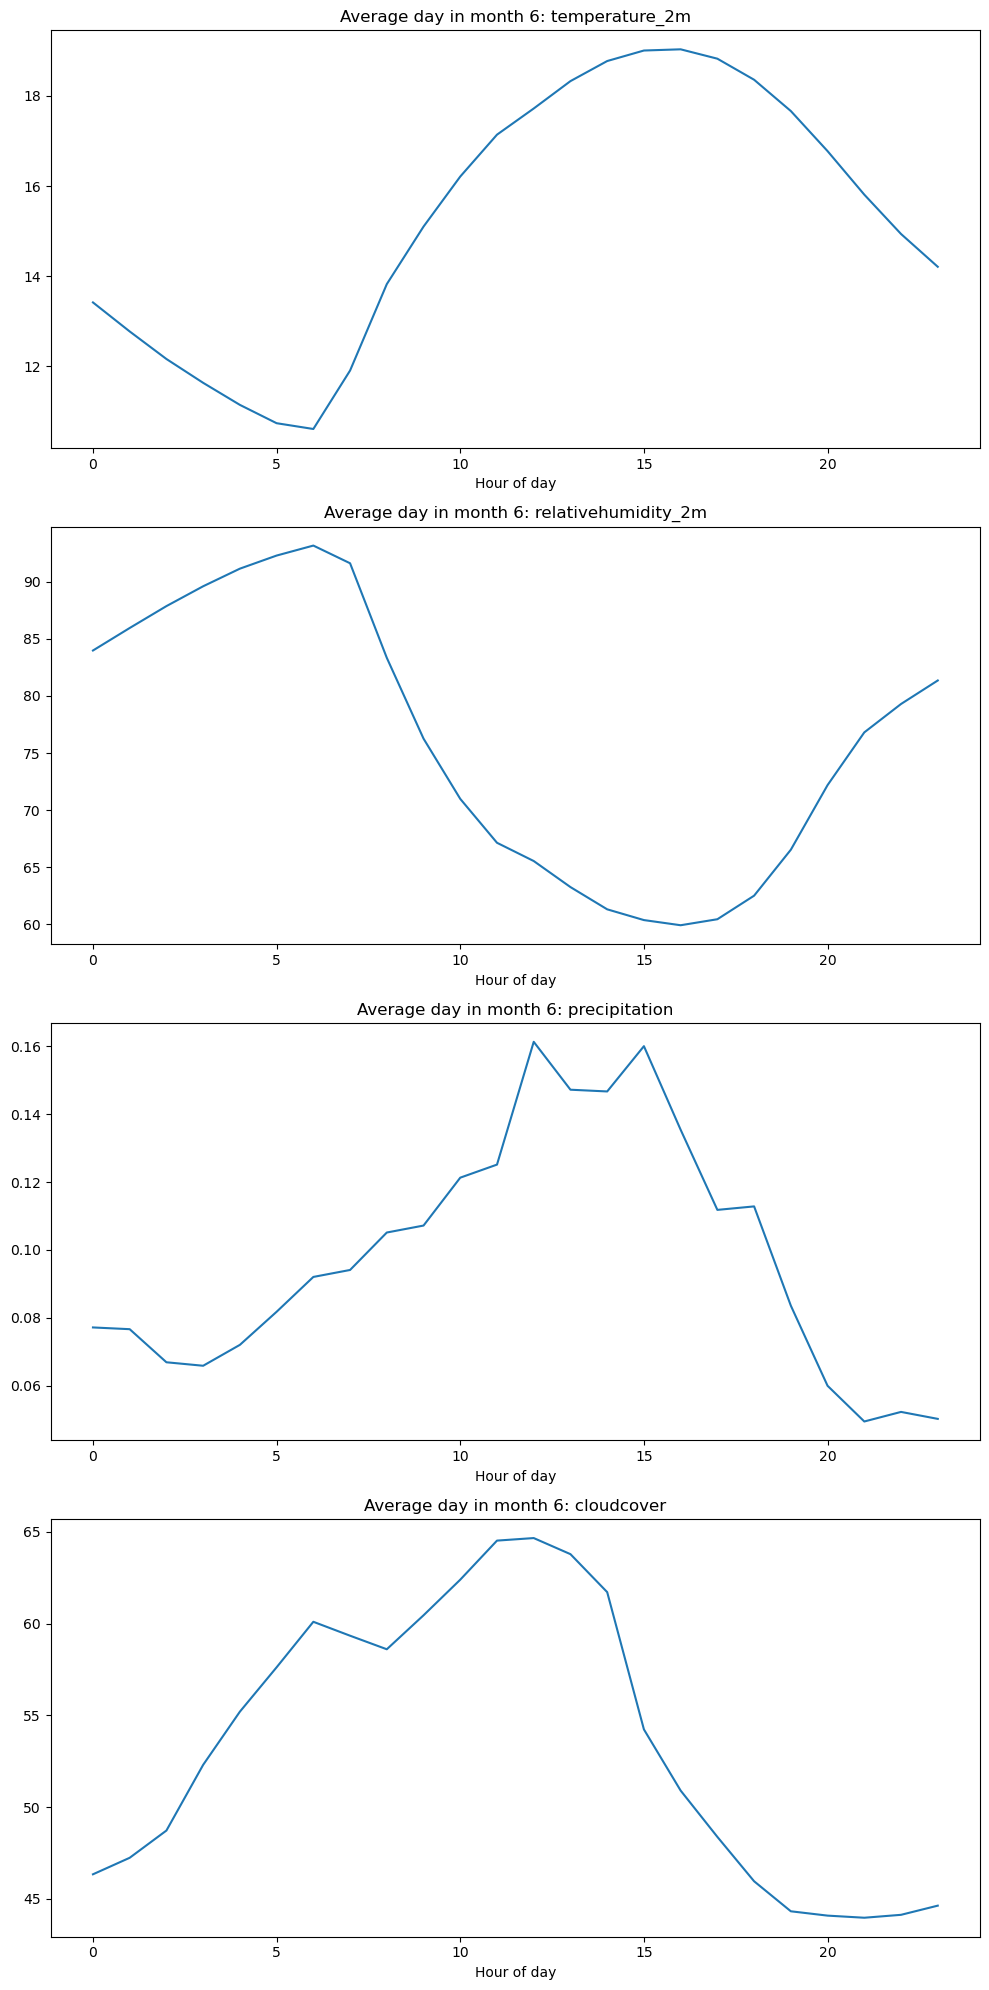

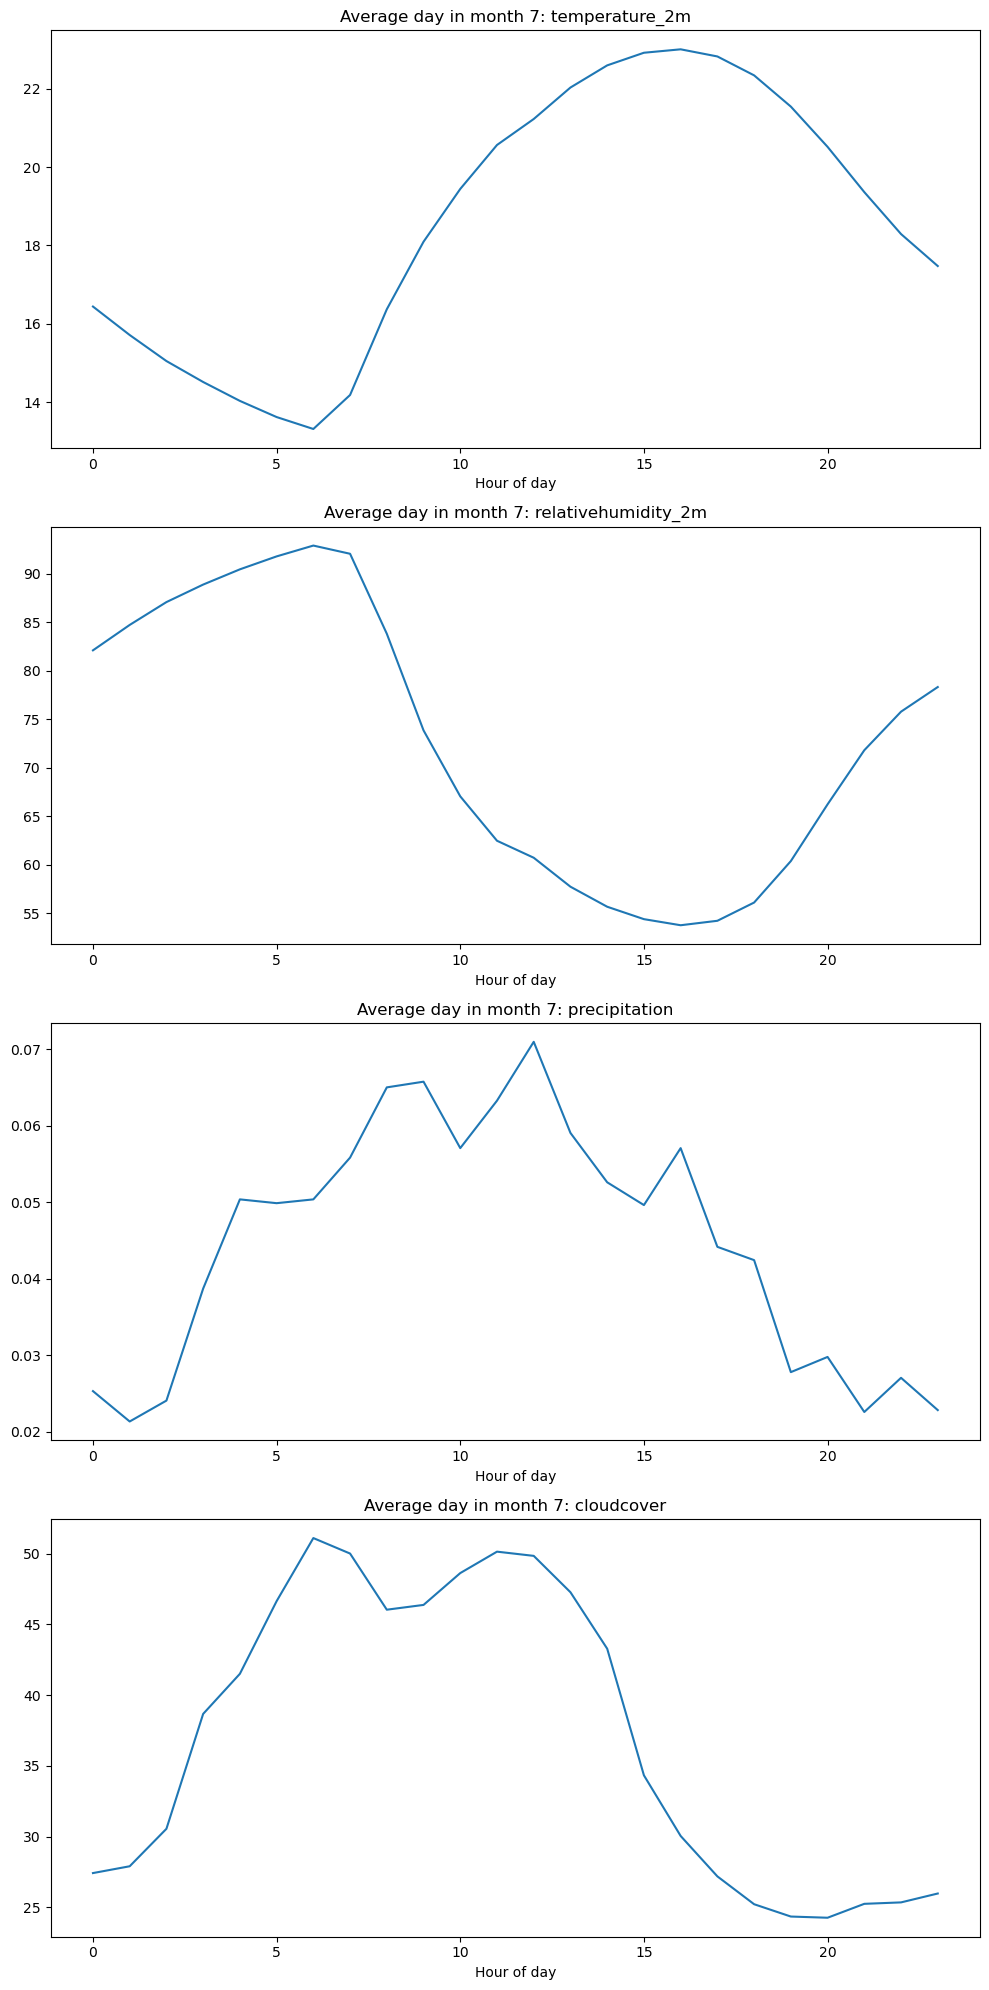

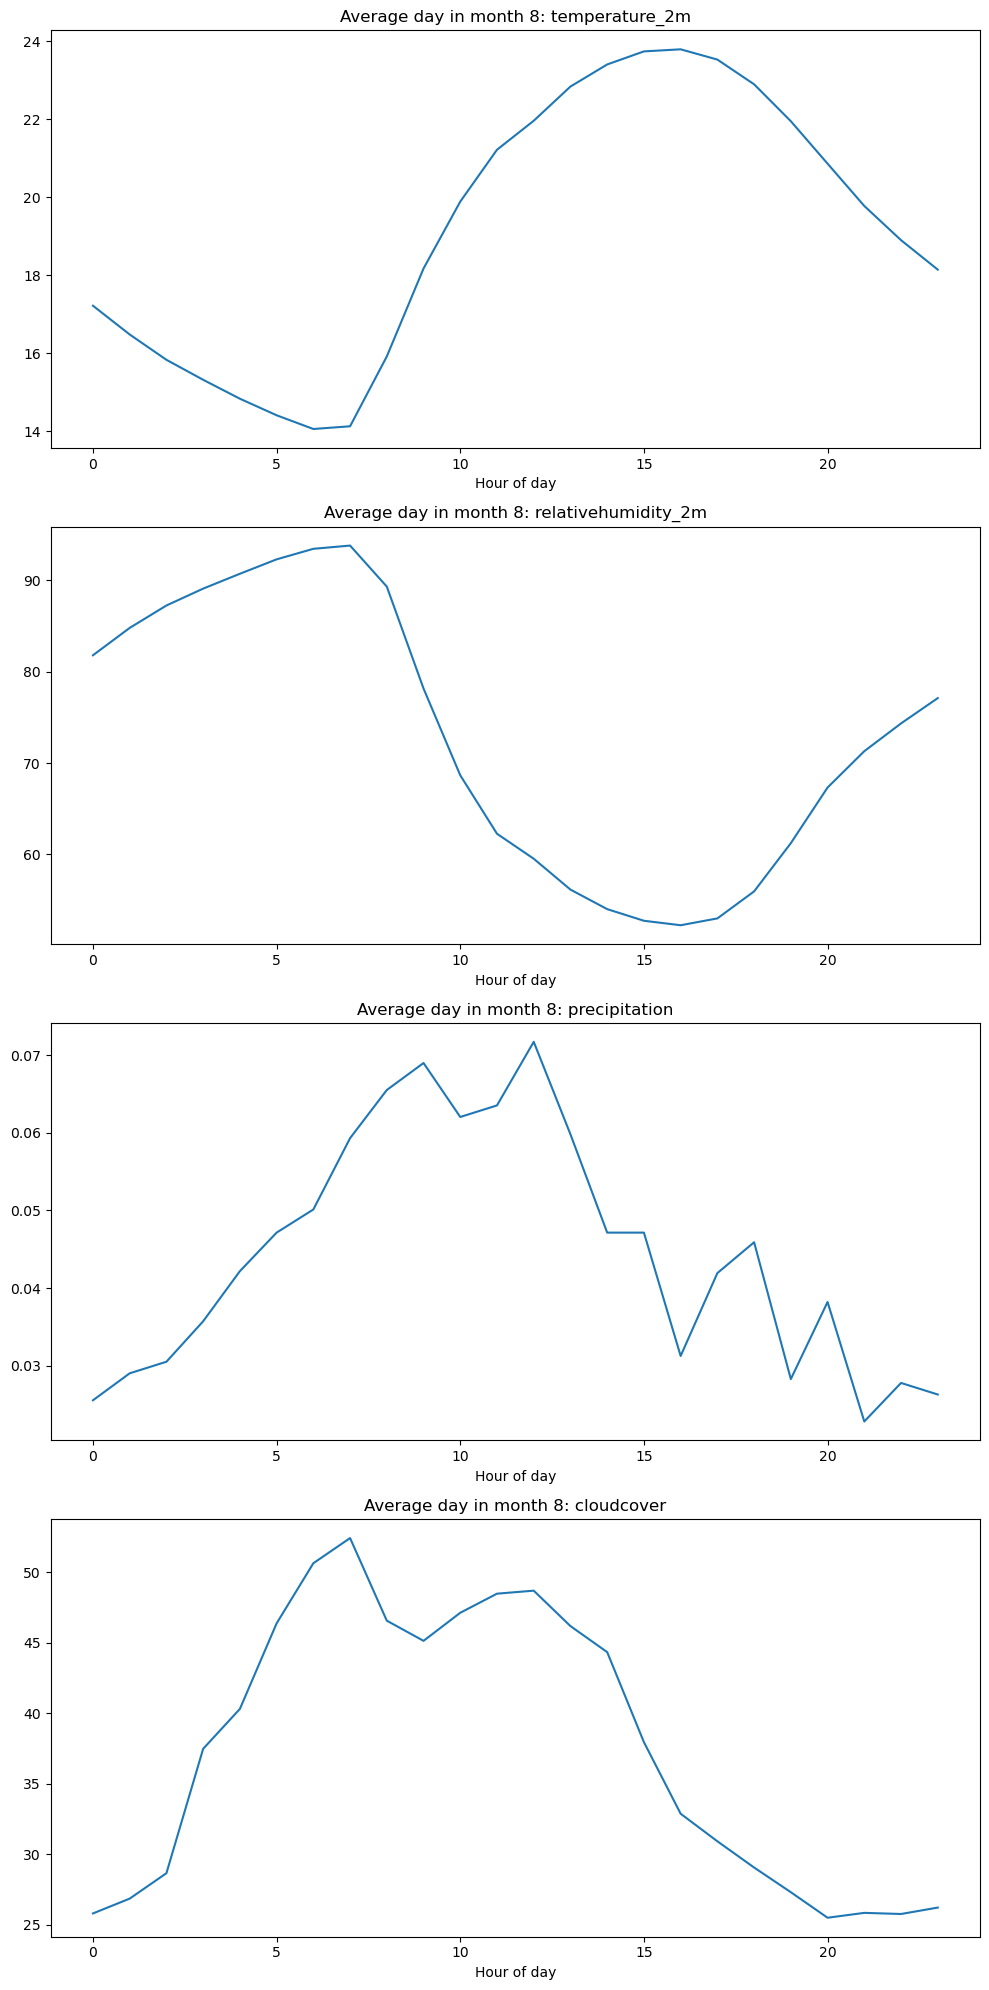

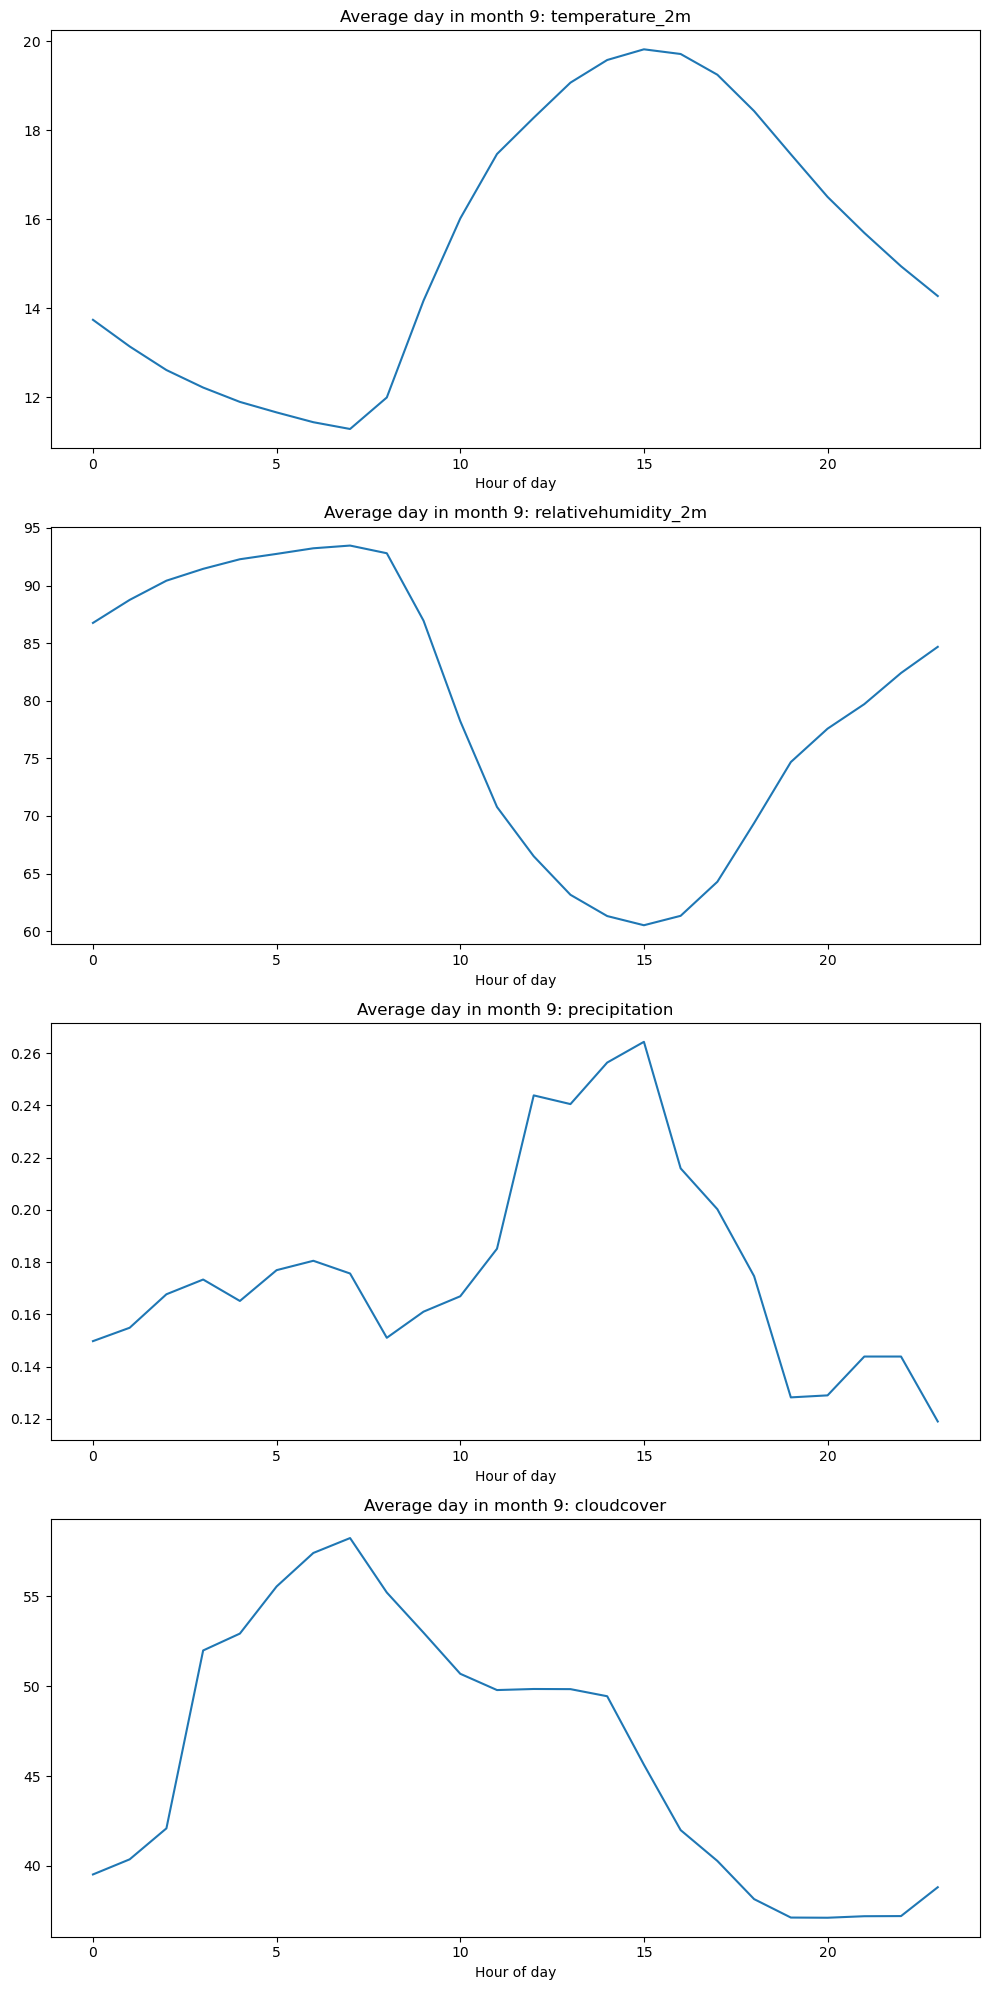

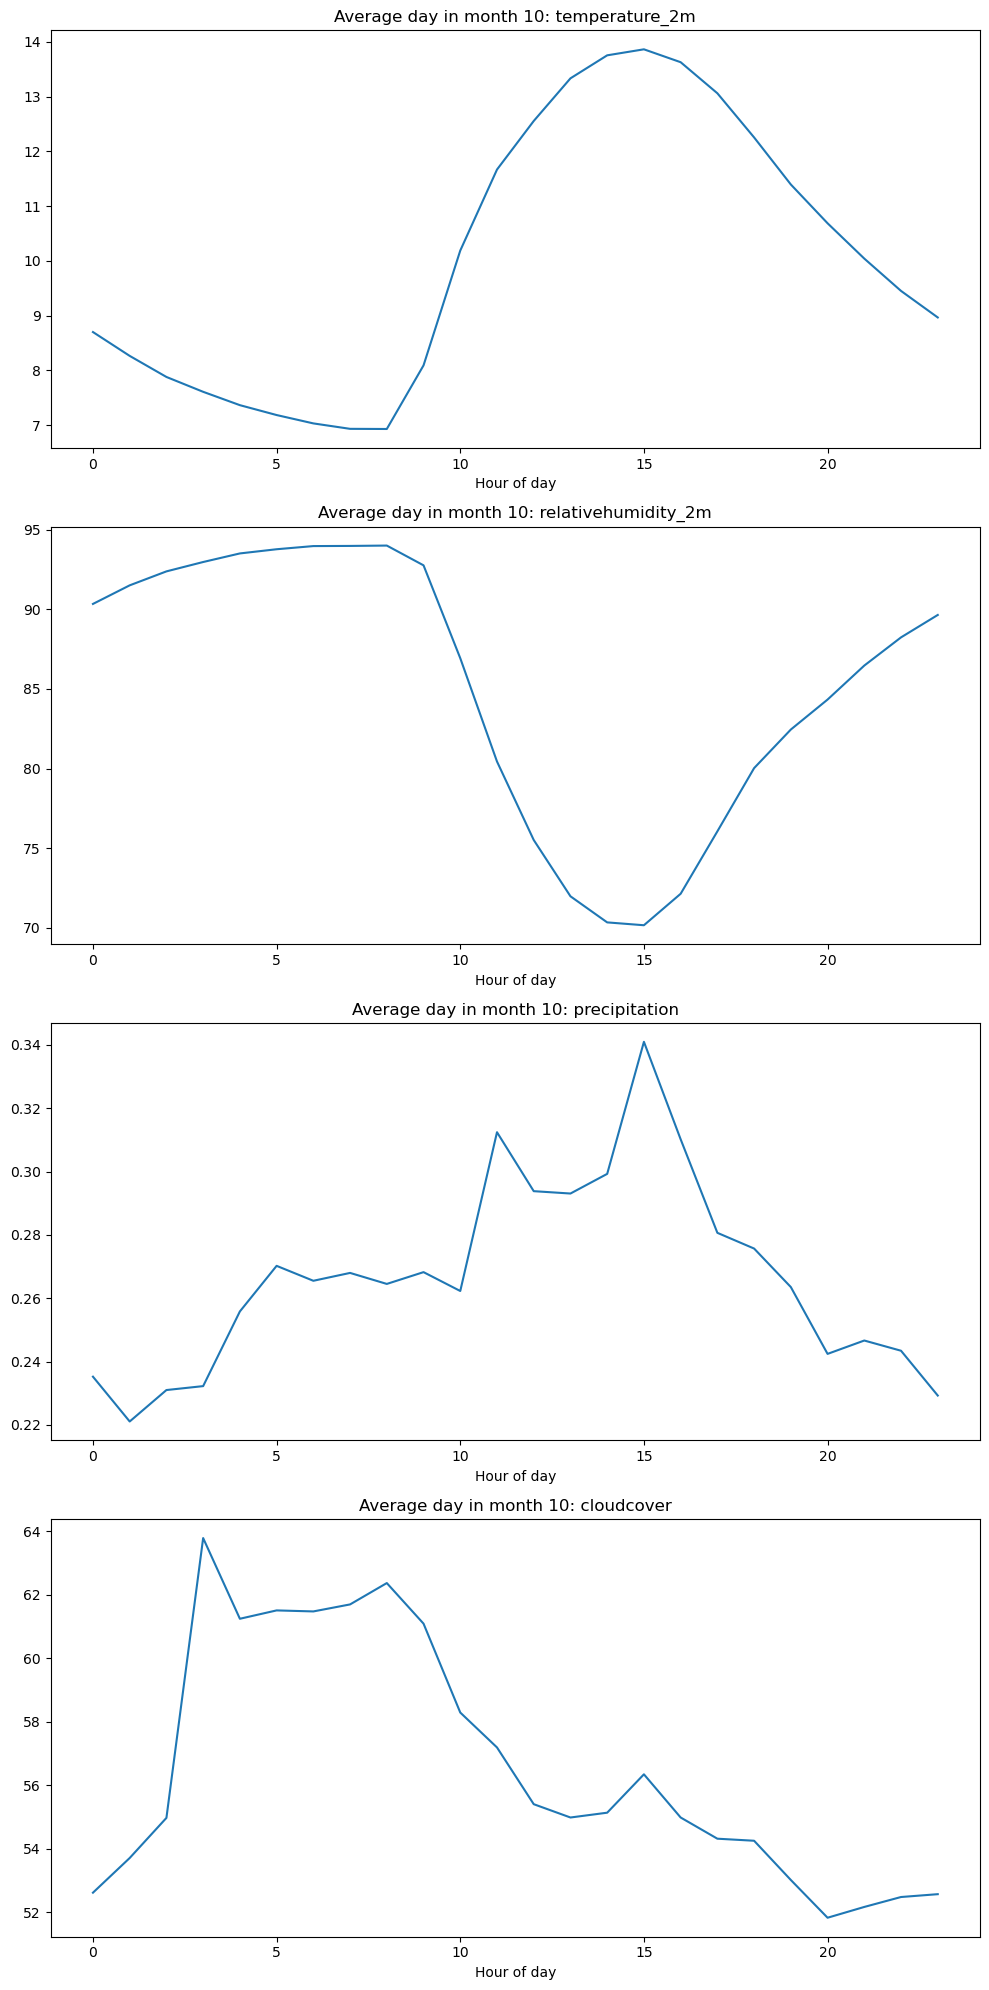

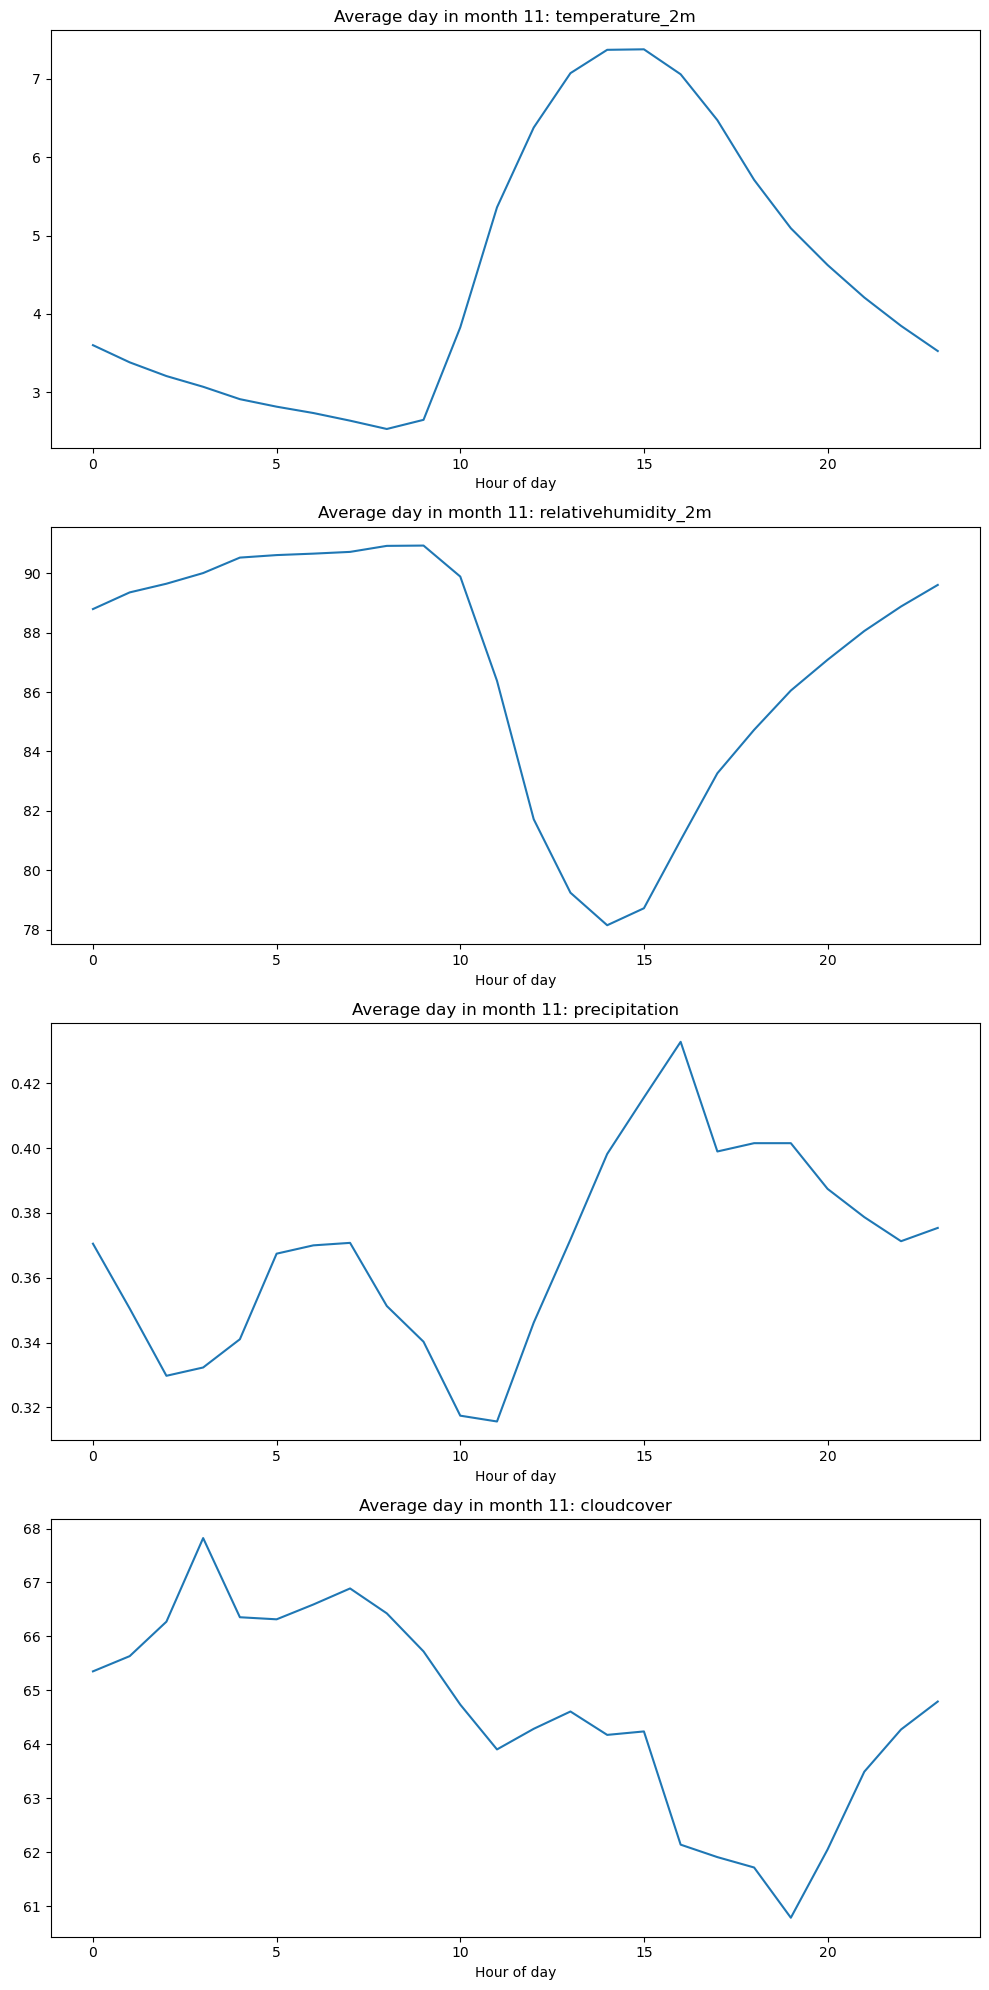

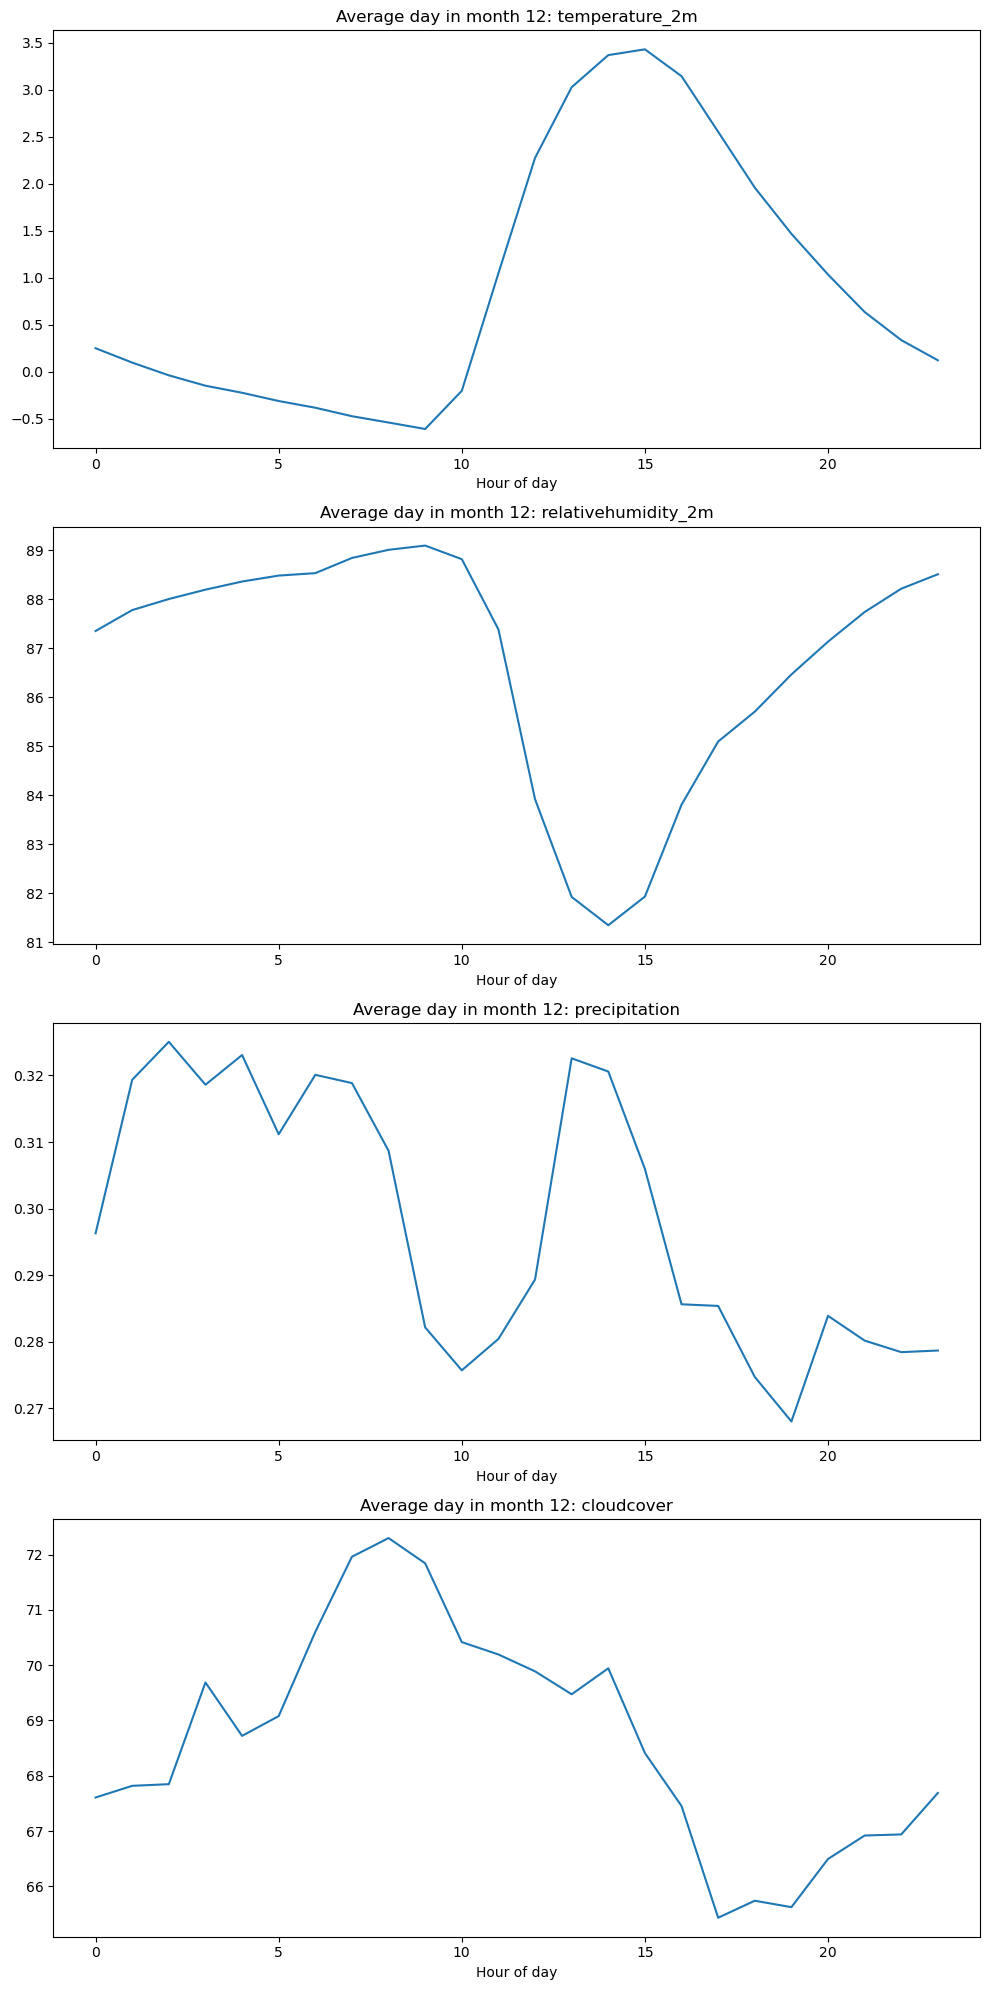

In [98]:

df_avg_day_hourly = df_hourly.groupby([df_hourly.index.month, df_hourly.index.hour]).mean()

# Now you can loop over the months and plot the average day for each month
for month in range(1, 13):
    fig, axs = plt.subplots(len(df_hourly.columns), 1, figsize=(10, 20))

    df_sub = df_avg_day_hourly.loc[month]

    for i, col in enumerate(df_hourly.columns):
        axs[i].plot(df_sub.index, df_sub[col])
        axs[i].set_title(f'Average day in month {month}: {col}')
        axs[i].set_xlabel('Hour of day')

    plt.tight_layout()
    plt.show()

In [99]:
df_avg_day_hourly.index.names = ['month', 'hour']

In [100]:
df_avg_day_hourly

temperature_2m  relativehumidity_2m  precipitation  cloudcover
month hour                                                                
1     0           0.904703            88.346535       0.309158   66.396040
      1           0.723515            88.861386       0.309406   65.490099
      2           0.568564            89.101485       0.309158   65.366337
      3           0.408168            89.232673       0.292574   67.452970
      4           0.272030            89.396040       0.311881   66.155941
...                    ...                  ...            ...         ...
12    19          1.467246            86.466501       0.267990   65.625310
      20          1.033251            87.136476       0.283871   66.496278
      21          0.634491            87.741935       0.280149   66.920596
      22          0.334988            88.218362       0.278412   66.940447
      23          0.120099            88.513648       0.278660   67.689826

[288 rows x 4 columns]

In [2]:
# climate data categorical


# import requests

# url = "https://koppen-climate-classification.p.rapidapi.com/classification"

# querystring = {"lat":"49.078078","lon":"-122.3508038"}

# headers = {
# 	"X-RapidAPI-Key": "02af329317msh0462d9135f248fbp198b4bjsn5eebb00426cb",
# 	"X-RapidAPI-Host": "koppen-climate-classification.p.rapidapi.com"
# }

# response = requests.get(url, headers=headers, params=querystring)

# print(response.json())

{'resource': 'koppen', 'location': {'latitude': '49.25', 'longitude': '-122.25'}, 'classification': 'Cfb'}


In [4]:
response.json()["classification"]

climate_data = {}

climate_data["49.25;-122.25"] = response.json()["classification"]

'Cfb'